# Performance of ens-poGAMBITT and poGAMBITT as Access to True Conditional Distribution of Treatment (Z) Changes 

In [2]:
import numpy as np
import pandas as pd
import plotnine as gg
import re
import sys
import os
import yaml

import glob 
import pickle

In [3]:
import matplotlib.pyplot as plt


In [4]:
from utils import *

/home/marcbr/miniconda3/envs/nats/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [5]:
save_folder = '../results/plots/supplement/db_acess_linear_env'

if not os.path.exists(save_folder):
    os.makedirs(save_folder, exist_ok=True)

In [6]:
results = load_simulation_results('../data/results/db_access_sd_0_linear_env_2025-10-14', env="linear", sds = ["sd_0"]) 
# bL_results = load_simulation_results('../data/results/db_access_sd_0_linear_env_2025-10-09', agents=["MAB"], env="linear", sds = ["sd_0"]) 

In [6]:
# results = pd.concat([results, bL_results], ignore_index=True)

In [7]:
results.agent_type.value_counts()

agent_type
ens-poGAMBITTS    500000
poGAMBITTS        500000
StdTS             100000
Name: count, dtype: int64

In [7]:
results.loc[~results.gambitt_samples.isna(), 'gambitt_samples'] = (
    results
    .loc[results.agent_type.isin(['ens-poGAMBITTS', 'poGAMBITTS'])]
    .gambitt_samples.str.split(":").str[1].str.split().str[0]
    + " samples"
    )
results.gambitt_samples.value_counts()

gambitt_samples
15 samples     500000
500 samples    500000
50 samples     500000
100 samples    500000
Name: count, dtype: int64

In [8]:
results.loc[results.agent_type.isin(['StdTS']), 'gambitt_samples'] = results.loc[results.agent_type.isin(['StdTS']), 'agent_type']

In [9]:
results['gambitt_samples'] = results['gambitt_samples'].fillna("Complete")
results['gambitt_samples'].value_counts()

gambitt_samples
15 samples     500000
500 samples    500000
50 samples     500000
Complete       500000
100 samples    500000
StdTS          250000
Name: count, dtype: int64

In [10]:
results.agent_type.value_counts()

agent_type
ens-poGAMBITTS    1250000
poGAMBITTS        1250000
StdTS              250000
Name: count, dtype: int64

In [11]:
agg_cols = ['agent_type', 'gambitt_samples', "t"]
agg_res = get_agg_results(df=results, group_ix=agg_cols) 
sim_cr = agg_res.cum_regret.reset_index()  

#### poGAMBITTS

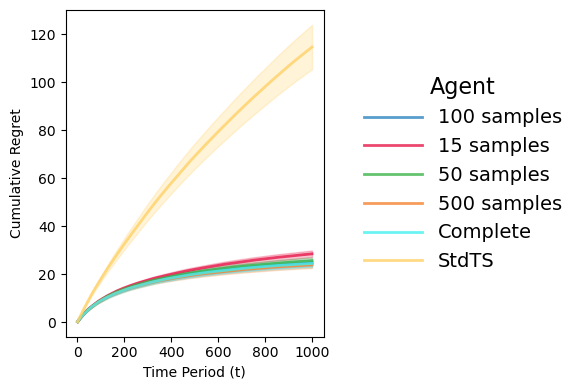

In [12]:
p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(['poGAMBITTS','StdTS']))], 
fill = "gambitt_samples", 
title = ""))
with open(os.path.join(save_folder, 'linear_env_pogambitts_db_access.pckl'), "wb") as f:
    pickle.dump(p, f)

#### ens-poGAMBITTS

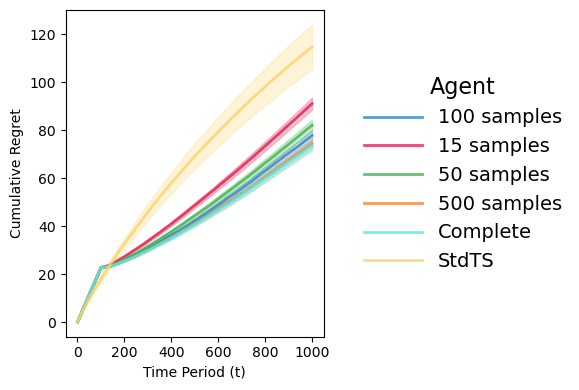

In [13]:
p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(['ens-poGAMBITTS','StdTS']))], 
fill = "gambitt_samples", 
title = ""))
with open(os.path.join(save_folder, 'linear_env_enspogambitts_db_access.pckl'), "wb") as f:
    pickle.dump(p, f)

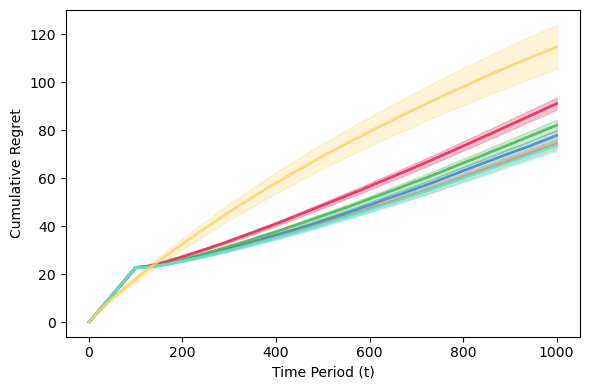

In [14]:
p = ( make_regret_plot_matplotlib(df = sim_cr.loc[(sim_cr.agent_type.isin(['ens-poGAMBITTS','StdTS']))], 
fill = "gambitt_samples", 
title = "",
include_legend=False))
with open(os.path.join(save_folder, 'linear_env_enspogambitts_db_access_nolgnd.pckl'), "wb") as f:
    pickle.dump(p, f)